In [1]:
import numpy as np
import pandas as pd
%matplotlib nbagg
import matplotlib.pyplot as plt

In [2]:
#get photon energies
d = pd.read_csv('../electron_sims/20m_coinc/build/photE.txt',header=None,delimiter="\t")
e = np.array(d[4])

<IPython.core.display.Javascript object>


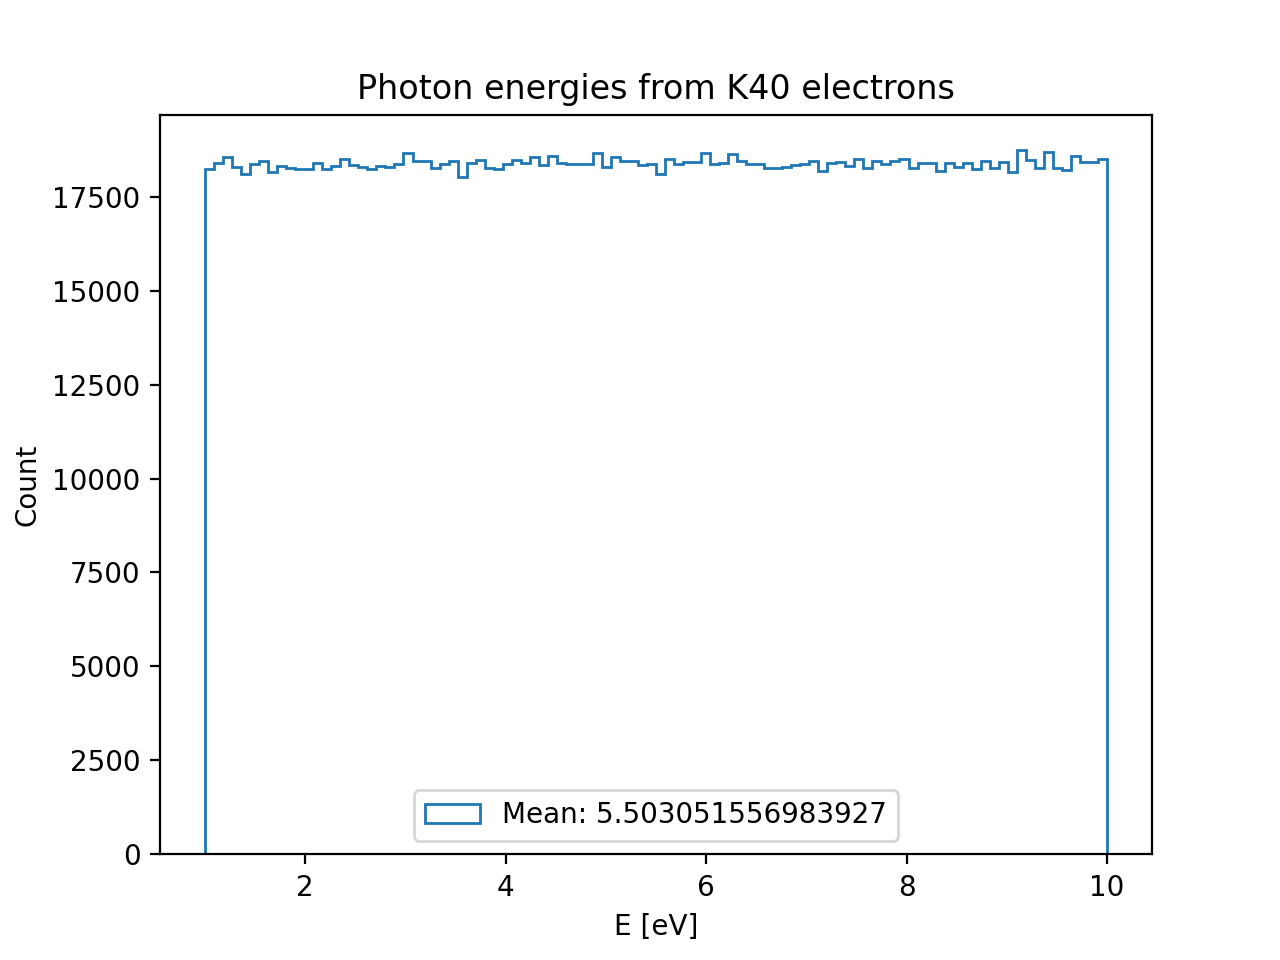

In [3]:
#plot photon energies
plt.close()
plt.figure()
plt.hist(e,histtype='step',bins=100,label="Mean: "+str(np.average(e)))
plt.title("Photon energies from K40 electrons")
plt.xlabel("E [eV]")
plt.ylabel("Count")
plt.legend(loc='lower center')
plt.show()

<IPython.core.display.Javascript object>


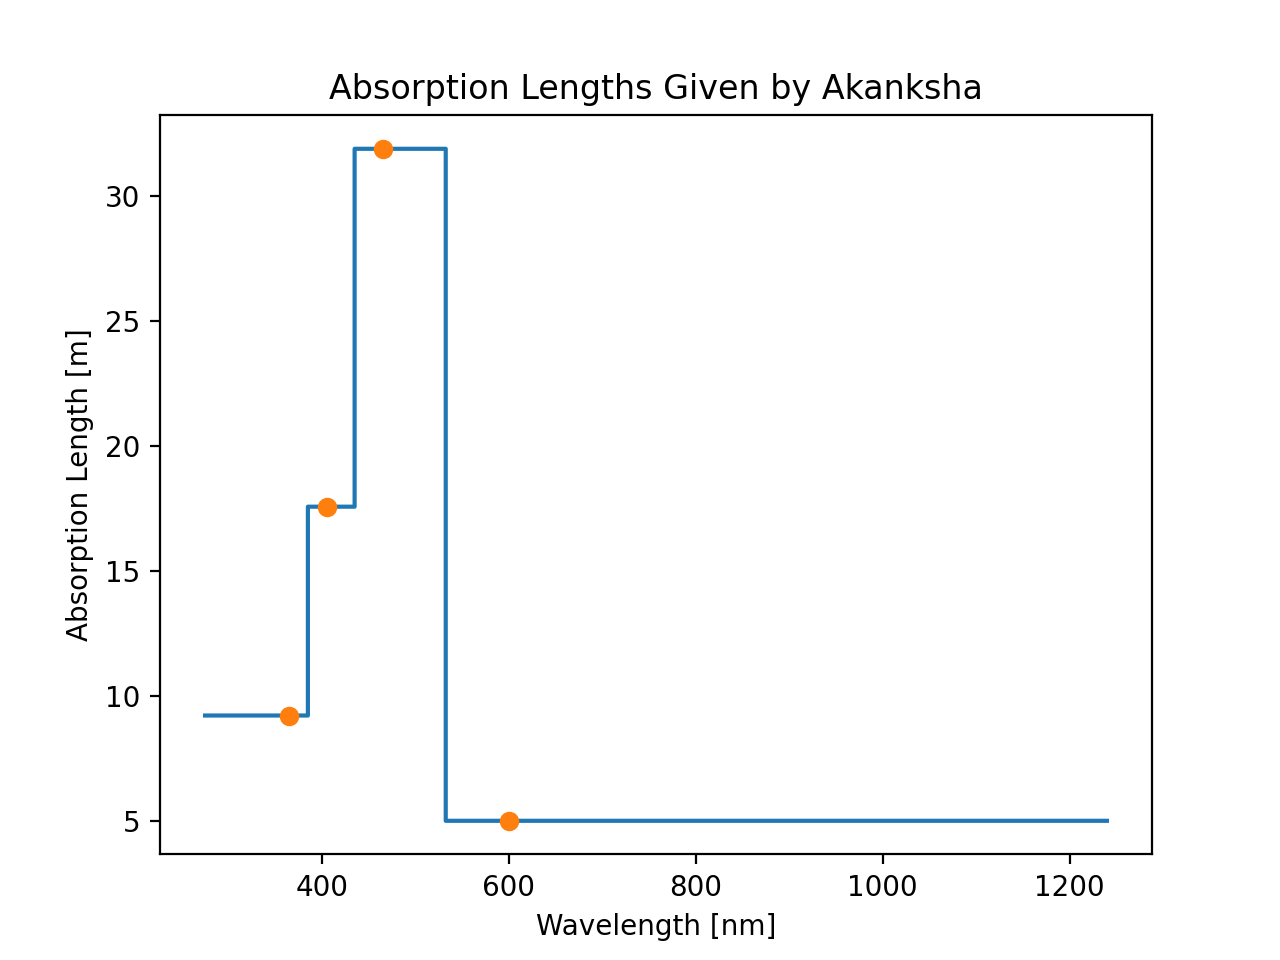

In [4]:
#plot function of absorption lengths to use in simulation
#make it 0th order, a hist like distribution with the points given in orange
plt.close()
plt.plot([275,384.999,385,434.999,435,532.499,532.5,1240],[9.21,9.21,17.56,17.56,31.87,31.87,5,5],'-')
plt.plot([365,405,465,600],[9.21,17.56,31.87,5],'o',color="C1")
plt.title("Absorption Lengths Given by Akanksha")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Absorption Length [m]")
plt.show()

<IPython.core.display.Javascript object>


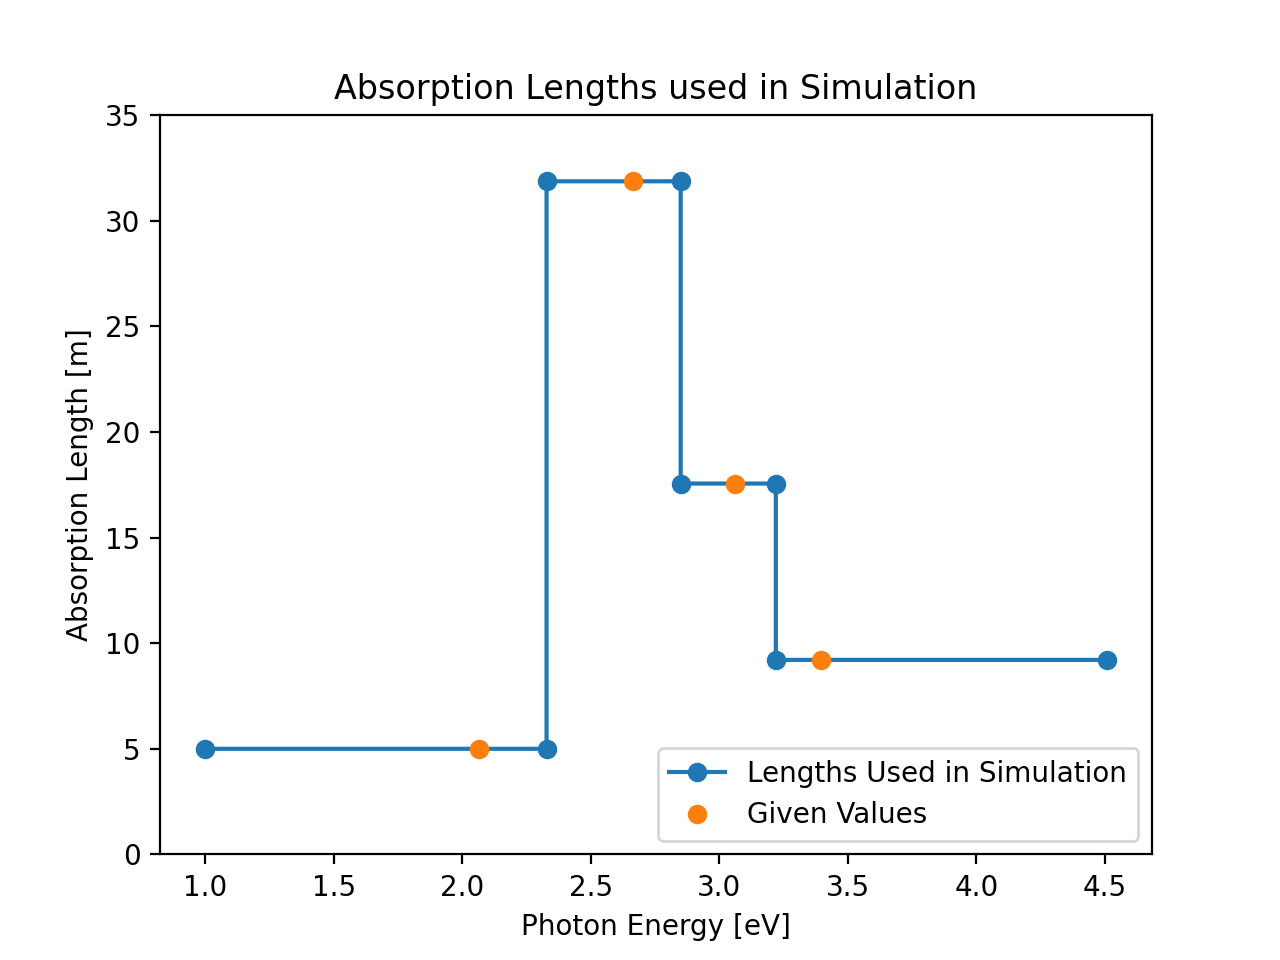

In [19]:
#replot as a function of energy
plt.close()
plt.plot([4.50852, 3.22038, 3.22037, 2.85022, 2.85021, 2.32835, 2.32834,
       0.99987],[9.21,9.21,17.56,17.56,31.87,31.87,5,5],'o-',label="Lengths Used in Simulation")
plt.plot(lam2eV(np.array([365,405,465,600])),[9.21,17.56,31.87,5],'o',color="C1",label="Given Values")
plt.title("Absorption Lengths used in Simulation")
plt.xlabel("Photon Energy [eV]")
plt.ylabel("Absorption Length [m]")
plt.legend(loc=0)
plt.ylim(0,35)
plt.show()

# Comparison

In [66]:
#ran sims and wanted to compare each method of inputting the absorption length, along with single abosorption for
#all wavelengths
oldAbs = pd.read_csv('../electron_sims/20m_coinc/energy_test/oldfiles.txt',header=None,delimiter="\t")
newAbs = pd.read_csv('../electron_sims/20m_coinc/energy_test/newfiles.txt',header=None,delimiter="\t")
his= pd.read_csv('../electron_sims/20m_betterAbs/better.txt',header=None,delimiter="\t")

In [67]:
oE = np.array(oldAbs[5])
nE = np.array(newAbs[5])
hE = np.array(his[5])

<IPython.core.display.Javascript object>


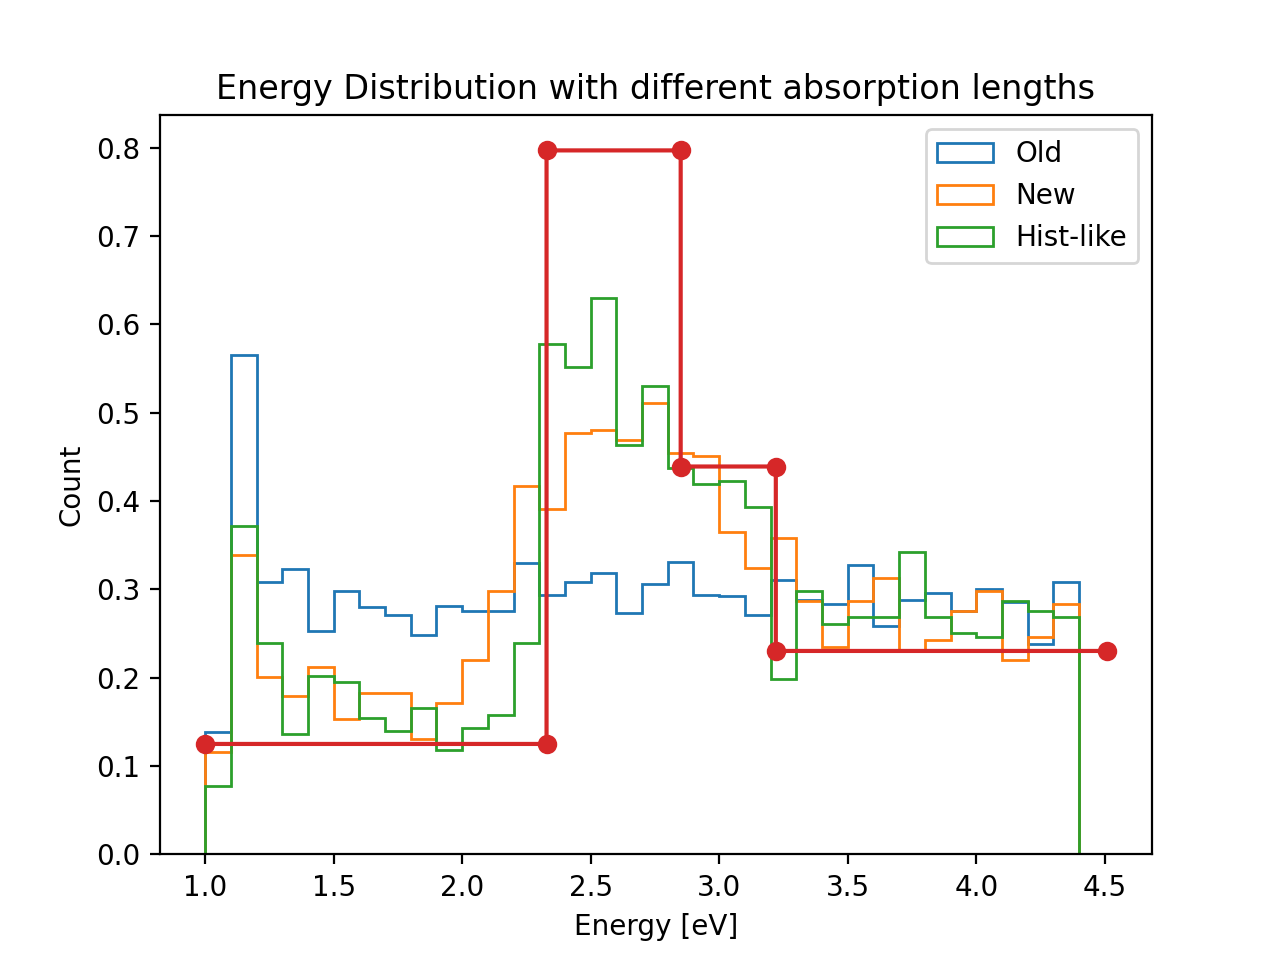

In [68]:
bi=np.arange(1,4.5,0.1)
plt.close()
plt.hist(oE,histtype="step",bins=bi,label='Old',density=True)
plt.hist(nE,histtype="step",bins=bi,label='New',density=True)
plt.hist(hE,histtype="step",bins=bi,label="Hist-like",density=True)
plt.plot([4.50852, 3.22038, 3.22037, 2.85022, 2.85021, 2.32835, 2.32834,
       0.99987],0.025*np.array([9.21,9.21,17.56,17.56,31.87,31.87,5,5]),'o-')
plt.xlabel("Energy [eV]")
plt.ylabel("Count")
plt.title("Energy Distribution with different absorption lengths")
plt.legend(loc=0)
plt.show()

In [59]:
lamvals = np.array([275,384.999,385,434.999,435,532.499,532.5,1240])
Evals = lam2eV(lamvals)
Evals = np.around(Evals,5)
Evals

array([4.50852, 3.22038, 3.22037, 2.85022, 2.85021, 2.32835, 2.32834,
       0.99987])

In [14]:
import scipy.constants as co
def lam2eV(l): #l in nm
    '''Write function to convert from wavelength to energy and vice versa, length in nm, E in eV'''
    return co.h*co.c/co.elementary_charge/1e-9/l

In [40]:
lam2eV(1)

1239.8419843320025